In [71]:
### Author : Prasad Meesala
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, metrics, model_selection, datasets

In [72]:
# Collecting the data

data = datasets.load_iris()  # Using pre-defined datasets in sklearn
print(dir(data))

df = pd.DataFrame(data.data, columns = data.feature_names)

df['flower'] = data.target
df['flower_name'] = df['flower'].apply(lambda x : data.target_names[x])
df.head()

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [73]:
# Splitting the dataset into respective categories

df0 = df[df['flower'] == 0]
df1 = df[df['flower'] == 1]
df2 = df[df['flower'] == 2]

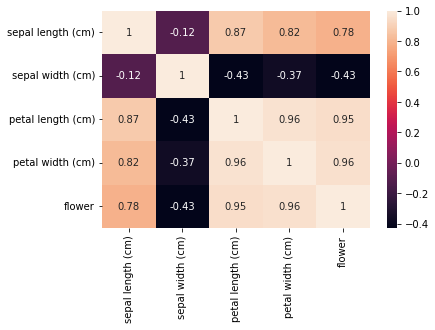

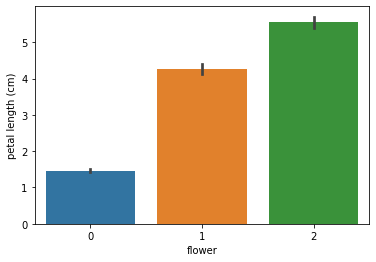

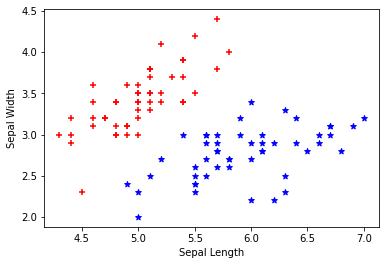

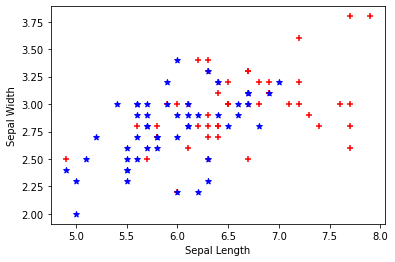

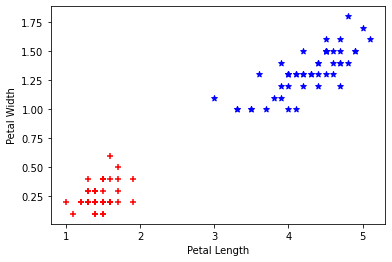

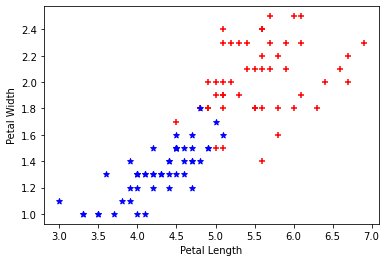

In [74]:
# Visualizing the dataset

## Correlation between the variables

sns.heatmap(df.corr(), annot = True)
plt.show()

## Flower and Petal Length

sns.barplot(x = 'flower', y = 'petal length (cm)', data = df)
plt.show()

## Flower 0 and Flower 1 (sepal length and sepal width)

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = "red", marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = "blue", marker = '*')
plt.show()

## Flower 1 and Flower 2 (sepal length and sepal width)

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = "red", marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = "blue", marker = '*')
plt.show()

## Flower 0 and Flower 1 (sepal length and sepal width)

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = "red", marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = "blue", marker = '*')
plt.show()

## Flower 2 and Flower 1 (sepal length and sepal width)

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = "red", marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = "blue", marker = '*')
plt.show()

In [75]:
# Splitting the data into training and testing data

X = df.drop(['flower', 'flower_name'], axis = 1).values
y = df['flower'].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1)

In [79]:
# Training the model

model = svm.SVC(kernel = "linear")
model.fit(X_train, y_train)

SVC(kernel='linear')

In [80]:
# Predicting the outcome

y_predicted = model.predict(X_test)
print(y_predicted, y_test)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2] [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]


Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



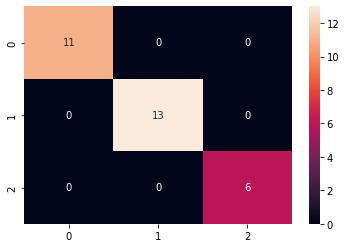

In [82]:
# Checking the accuracy of the model

print("Accuracy : ", model.score(X_test, y_test))
print(metrics.classification_report(y_test, y_predicted))

## Analyzing where the model has predicted wrongly

sns.heatmap(metrics.confusion_matrix(y_test, y_predicted), annot = True)
plt.show()